In [1]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
files=[file for file in os.listdir('./Sales_Data')]
print(files)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


In [3]:
data=pd.DataFrame()
for file in files:
    df=pd.read_csv('./Sales_Data/'+file)
    data=pd.concat([data,df])
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
data.shape

(186850, 6)

## Data Cleansing 


In [5]:
# Removing Nan Values from the data set

In [6]:
data=data.dropna(how='all')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
data.shape

(186305, 6)

In [8]:
data.dtypes


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [9]:
# Encountered string type of data on some cells, so removing it

In [10]:
data=data[data['Order Date'].str[0:2]!='Or']

In [11]:
# Converting columns to proper datatypes

In [12]:
data['Quantity Ordered']=data['Quantity Ordered'].astype('int32')
data['Price Each']=data['Price Each'].astype('float32')
data['Order Date']=pd.to_datetime(data['Order Date'])

## Augmenting new columns like Sales, Month, City, Hour etc....

In [13]:
data['Sales']=data['Price Each']* data['Quantity Ordered']
data['Month']=pd.DatetimeIndex(data['Order Date']).month

In [23]:
data['Hour']=pd.DatetimeIndex(data['Order Date']).hour

In [24]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.900000,4,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.989998,4,Boston MA,22
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.000000,4,Los Angeles CA,14
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.990000,4,Los Angeles CA,14
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.990000,4,Los Angeles CA,9


In [25]:
data['City']=data['Purchase Address'].apply(lambda x:x.split(',')[1] + ' '+ x.split(' ')[-2])

In [26]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.900000,4,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.989998,4,Boston MA,22
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.000000,4,Los Angeles CA,14
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.990000,4,Los Angeles CA,14
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.990000,4,Los Angeles CA,9


## Visualizing Sales for Cities by using groupby method.

In [34]:
cities= [city for city,x in data.groupby('City')]
cities

[' Atlanta GA',
 ' Austin TX',
 ' Boston MA',
 ' Dallas TX',
 ' Los Angeles CA',
 ' New York City NY',
 ' Portland ME',
 ' Portland OR',
 ' San Francisco CA',
 ' Seattle WA']

In [32]:
sales=data.groupby('City').sum()['Sales']
sales

City
 Atlanta GA          2.795499e+06
 Austin TX           1.819582e+06
 Boston MA           3.661642e+06
 Dallas TX           2.767975e+06
 Los Angeles CA      5.452571e+06
 New York City NY    4.664317e+06
 Portland ME         4.497583e+05
 Portland OR         1.870732e+06
 San Francisco CA    8.262204e+06
 Seattle WA          2.747755e+06
Name: Sales, dtype: float64

<BarContainer object of 10 artists>

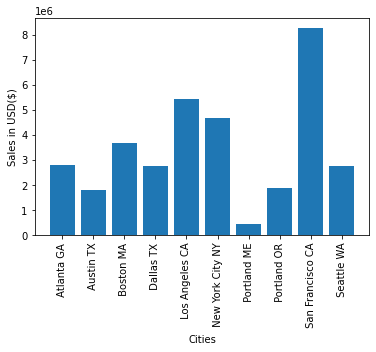

In [49]:
plt.xlabel('Cities')
plt.ylabel('Sales in USD($)')
plt.xticks(rotation='vertical')

plt.bar(cities,sales)